In [ ]:
#Importing Libraries

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Reading Data

In [ ]:
df=pd.read_csv('/content/Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
df1=df.copy()

In [ ]:
#Dropping Unwanted Columns

In [ ]:
df1.drop('sl_no',inplace=True,axis=1)

In [ ]:
df1

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [ ]:
#Checking for null values

In [ ]:
df1.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [ ]:
m=np.mean(df1['salary'])

In [ ]:
m

288655.4054054054

In [ ]:
df1['salary'].replace(np.nan,m,inplace=True)

In [ ]:
df1.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [ ]:
#Visualization

In [ ]:
#!pip install pandas-profiling

In [ ]:
import ydata_profiling as pp
profile = pp.ProfileReport(df)
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Handling Outliers

In [ ]:
df_num=df1.select_dtypes(float)
df_num

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,67.00,91.00,58.00,55.0,58.80,270000.000000
1,79.33,78.33,77.48,86.5,66.28,200000.000000
2,65.00,68.00,64.00,75.0,57.80,250000.000000
3,56.00,52.00,52.00,66.0,59.43,288655.405405
4,85.80,73.60,73.30,96.8,55.50,425000.000000
...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,400000.000000
211,58.00,60.00,72.00,74.0,53.62,275000.000000
212,67.00,67.00,73.00,59.0,69.72,295000.000000
213,74.00,66.00,58.00,70.0,60.23,204000.000000


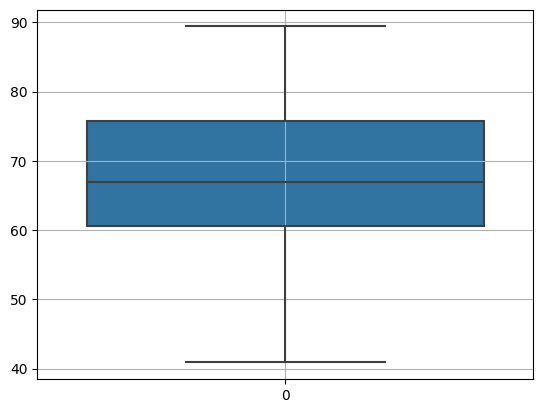

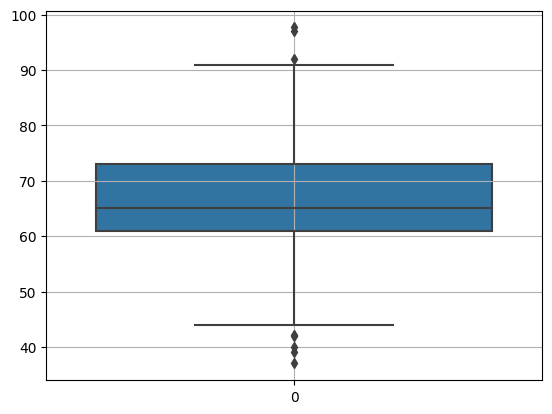

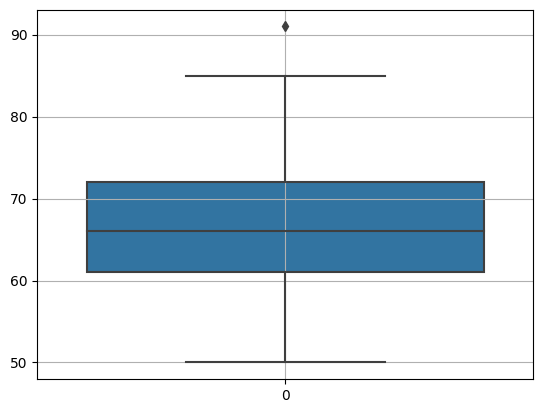

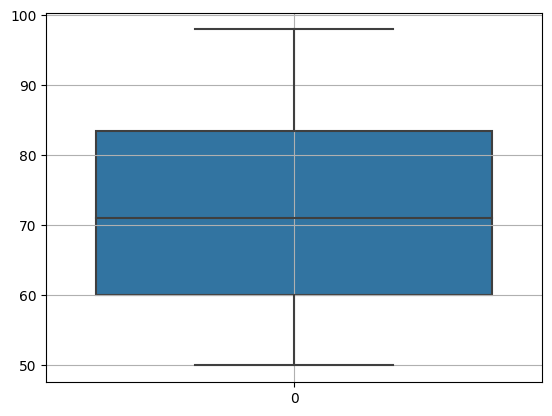

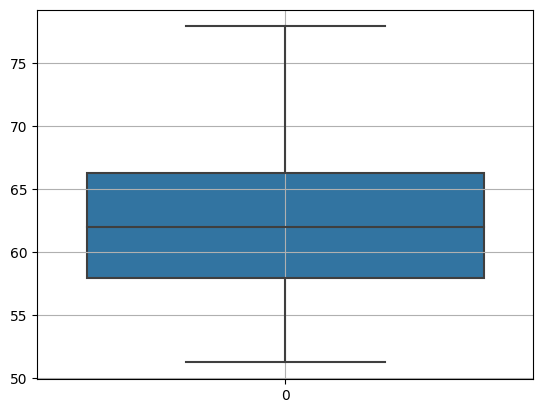

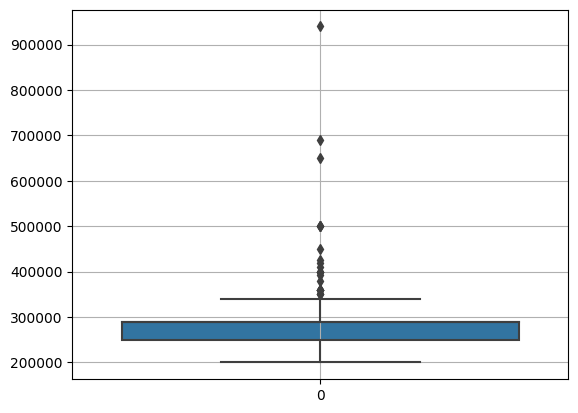

In [ ]:
for i in df_num:
  sns.boxplot(data=df_num[i])
  plt.grid()
  plt.show()

In [ ]:
def remove_outlier(df1,col_name):
            q1 = df1[col_name].quantile(0.25)
            q3 = df1[col_name].quantile(0.75)
            iqr = q3-q1
            lower  = q1-1.5*iqr
            upper = q3+1.5*iqr
            index = df1[(df[col_name] > upper)|(df1[col_name] < lower)].index
            df1.drop(index, inplace=True)

In [ ]:
for i in df_num:
    remove_outlier(df1,i)

In [ ]:
df_num1=df1.select_dtypes([int,float])

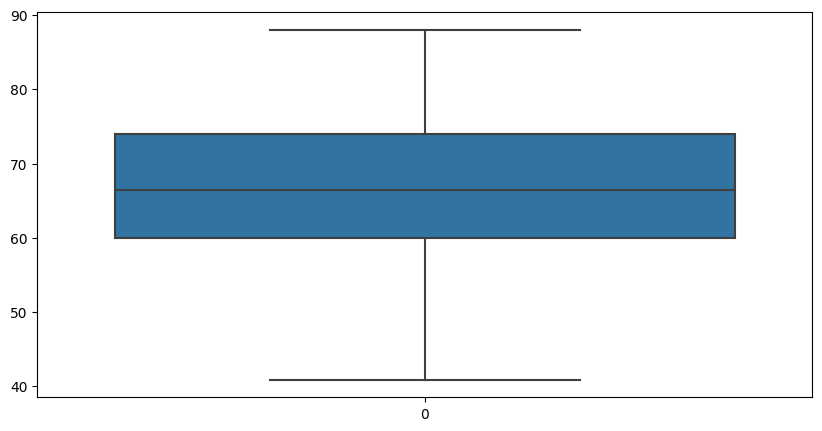

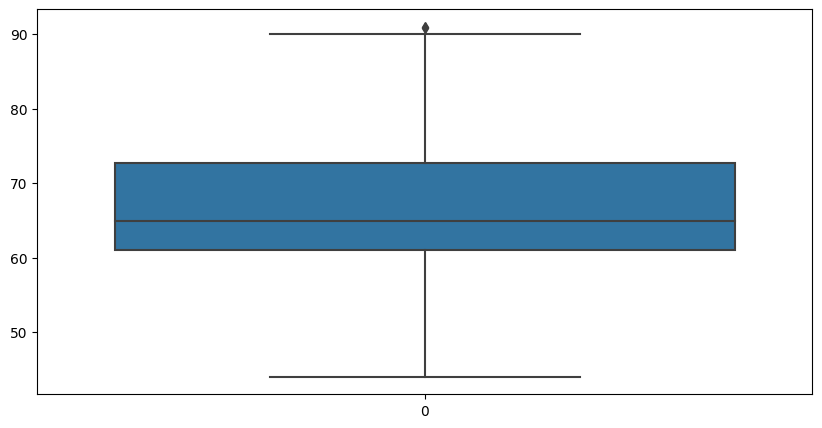

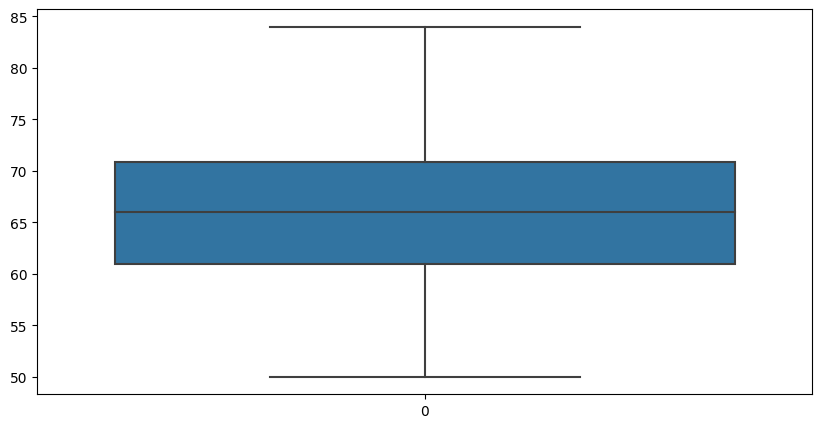

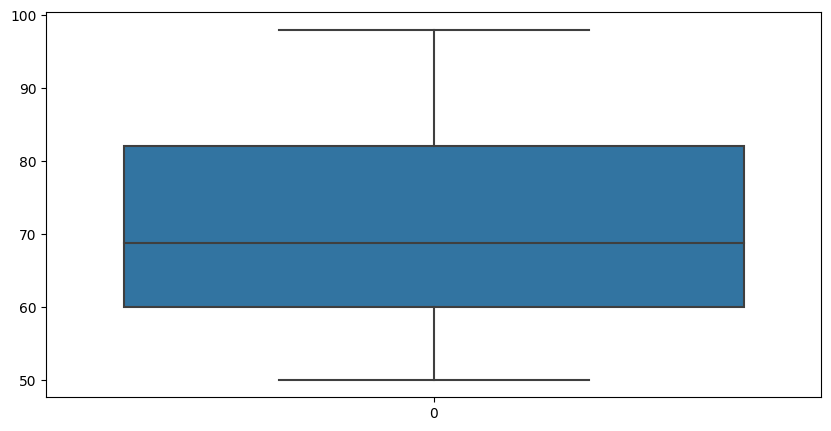

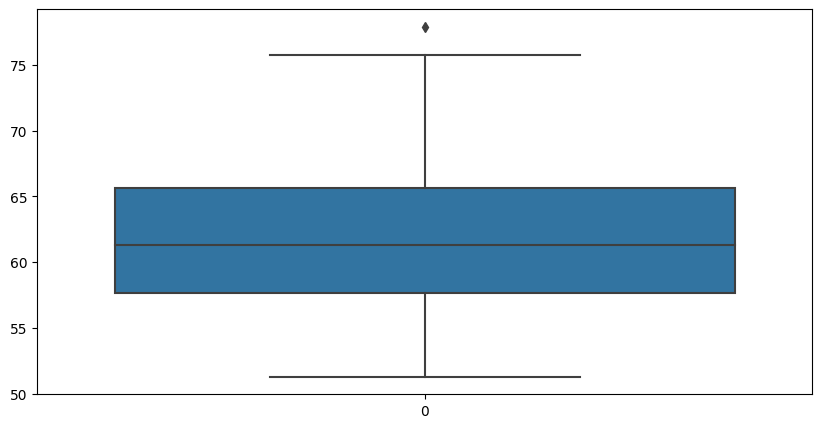

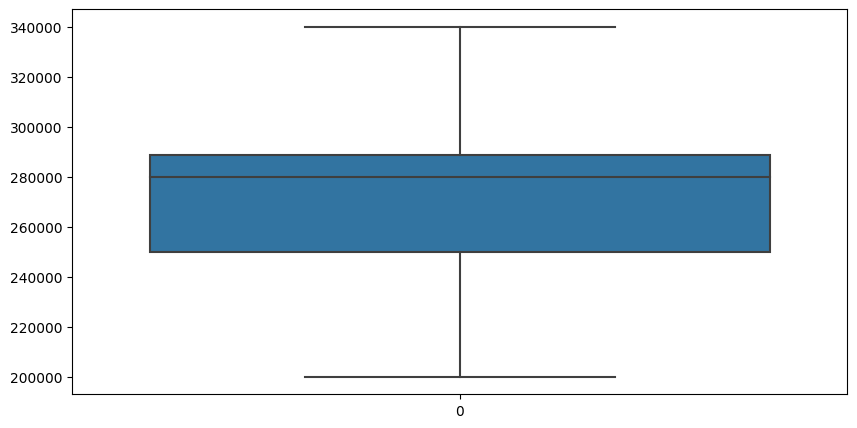

In [ ]:
for i in df_num1:
    fig = plt.figure(figsize=(10,5))
    sns.boxplot(df_num1[i])

In [ ]:
#Outliers are removed

In [ ]:
df1

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
5,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.0,Mkt&Fin,51.58,Not Placed,288655.405405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,Placed,216000.000000
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.000000
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.000000
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.000000


In [ ]:
#Encoding Target Col

In [ ]:
le=LabelEncoder()

In [ ]:
df1['status']=le.fit_transform(df1['status'])

In [ ]:
df1

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1,270000.000000
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1,200000.000000
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1,250000.000000
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0,288655.405405
5,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.0,Mkt&Fin,51.58,0,288655.405405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,1,216000.000000
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,1,275000.000000
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,1,295000.000000
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,1,204000.000000


In [ ]:
#Skewness

In [ ]:
df_num=df1.select_dtypes([float])

ssc_p
-0.03764411124205113


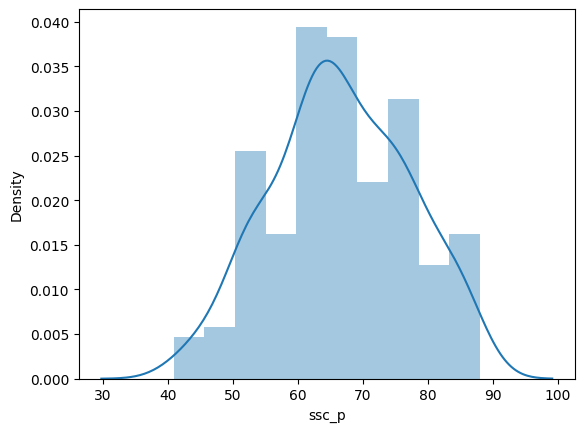

hsc_p
0.29501250896679676


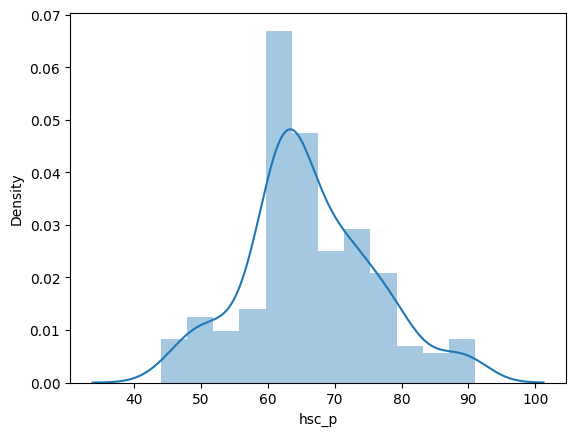

degree_p
0.10432272723514593


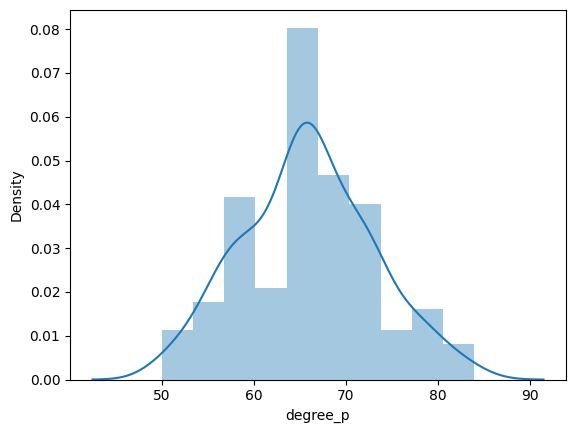

etest_p
0.3526801308559292


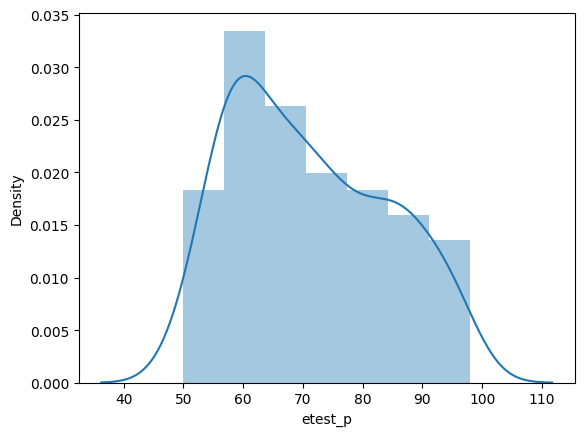

mba_p
0.3390192009412569


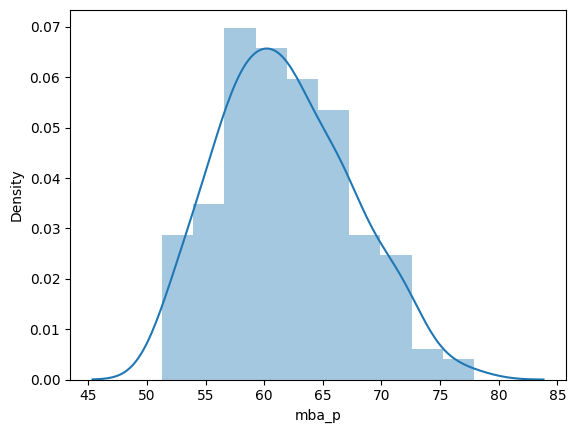

salary
-0.6097996387217931


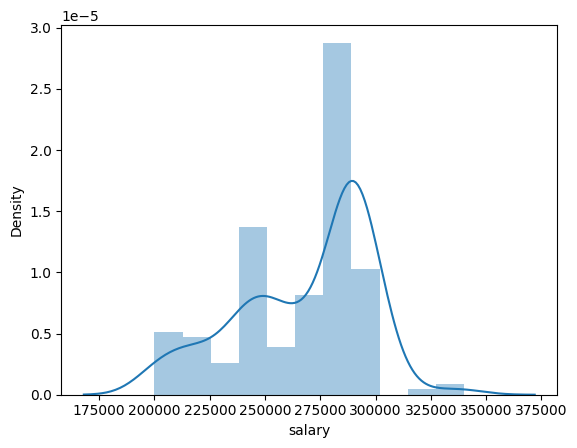

In [ ]:
for i in df_num:
    print(i)
    print(skew(df_num[i]))

    plt.figure()
    sns.distplot(df_num[i])
    plt.show()

In [ ]:
#Checking Correlation

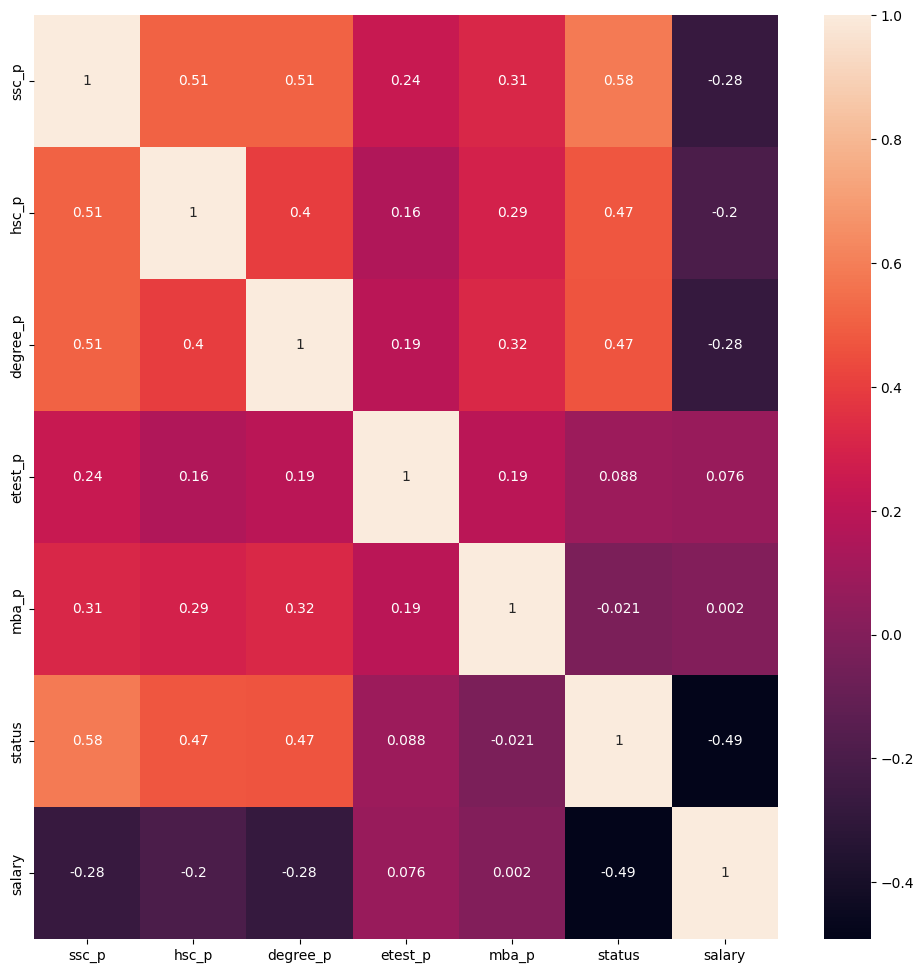

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [ ]:
#since mba_p has -ve correlation with target & degree_p , hsc_p have good +ve correlation with target so we will not reduce its skewness

In [ ]:
df1['etest_p']=np.log(df1['etest_p'])

In [ ]:
skew(df1['etest_p'])

0.12112775178171938

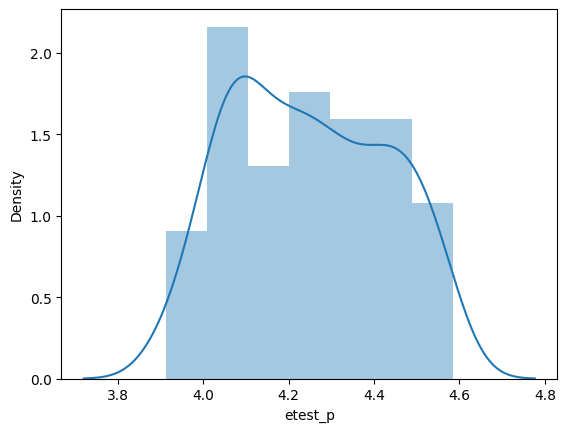

In [ ]:
sns.distplot(df1['etest_p'])
plt.show()

In [ ]:
#skewness is removed

In [ ]:
#Encoding

In [ ]:
df_cat=df1.select_dtypes('object').columns

In [ ]:
oe=OrdinalEncoder()

In [ ]:
df1[df_cat]=oe.fit_transform(df1[df_cat])

In [ ]:
df1.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [ ]:
df1=df1[['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'salary','status']]

In [ ]:
df1

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,status
0,1.0,67.00,1.0,91.00,1.0,1.0,58.00,2.0,0.0,4.007333,1.0,58.80,270000.000000,1
1,1.0,79.33,0.0,78.33,1.0,2.0,77.48,2.0,1.0,4.460144,0.0,66.28,200000.000000,1
2,1.0,65.00,0.0,68.00,0.0,0.0,64.00,0.0,0.0,4.317488,0.0,57.80,250000.000000,1
3,1.0,56.00,0.0,52.00,0.0,2.0,52.00,2.0,0.0,4.189655,1.0,59.43,288655.405405,0
5,1.0,55.00,1.0,49.80,1.0,2.0,67.25,2.0,1.0,4.007333,0.0,51.58,288655.405405,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,1.0,62.00,0.0,72.00,0.0,1.0,65.00,0.0,0.0,4.204693,0.0,56.49,216000.000000,1
211,1.0,58.00,1.0,60.00,1.0,2.0,72.00,2.0,0.0,4.304065,0.0,53.62,275000.000000,1
212,1.0,67.00,1.0,67.00,1.0,1.0,73.00,0.0,1.0,4.077537,0.0,69.72,295000.000000,1
213,0.0,74.00,1.0,66.00,1.0,1.0,58.00,0.0,0.0,4.248495,1.0,60.23,204000.000000,1


In [ ]:
#Splitting the data

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df1.drop(['status'],axis=1),df1['status'],test_size=0.2,stratify=df1['status'])

In [ ]:
y_test.value_counts(normalize=True)

1    0.648649
0    0.351351
Name: status, dtype: float64

In [ ]:
#Scaling

In [ ]:
stanc=StandardScaler()
train_scaled=stanc.fit_transform(X_train)
test_scaled=stanc.transform(X_test)

In [ ]:
train_scaled

array([[ 0.75491223,  0.58041531, -0.85912469, ..., -0.90829511,
         1.10000918,  0.20978077],
       [-1.32465731, -1.28156393, -0.85912469, ..., -0.90829511,
         0.90325996,  0.6771454 ],
       [ 0.75491223, -1.4187624 , -0.85912469, ..., -0.90829511,
        -0.88663562, -0.13247536],
       ...,
       [ 0.75491223, -1.47756174,  1.16397539, ..., -0.90829511,
        -0.3381754 ,  0.6771454 ],
       [ 0.75491223,  0.58041531, -0.85912469, ...,  1.10096377,
         0.70999302, -0.98811571],
       [-1.32465731,  0.67841421,  1.16397539, ...,  1.10096377,
        -0.26504737, -2.2202378 ]])

In [ ]:
### ANN starts

In [ ]:
model=Sequential()
model.add(Dense(3,activation='sigmoid',input_dim=13))
model.add(Dense(13,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 3)                 42        
                                                                 
 dense_4 (Dense)             (None, 13)                52        
                                                                 
 dense_5 (Dense)             (None, 1)                 14        
                                                                 
Total params: 108
Trainable params: 108
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history=model.fit(train_scaled,y_train,epochs=250,validation_split=0.2)

Epoch 1/250
4/4 [==============================] - 1s 57ms/step - loss: 0.7920 - accuracy: 0.3448 - val_loss: 0.8057 - val_accuracy: 0.3000
Epoch 2/250
4/4 [==============================] - 0s 9ms/step - loss: 0.7805 - accuracy: 0.3448 - val_loss: 0.7945 - val_accuracy: 0.3000
Epoch 3/250
4/4 [==============================] - 0s 9ms/step - loss: 0.7710 - accuracy: 0.3448 - val_loss: 0.7832 - val_accuracy: 0.3000
Epoch 4/250
4/4 [==============================] - 0s 9ms/step - loss: 0.7621 - accuracy: 0.3448 - val_loss: 0.7724 - val_accuracy: 0.3000
Epoch 5/250
4/4 [==============================] - 0s 9ms/step - loss: 0.7522 - accuracy: 0.3448 - val_loss: 0.7625 - val_accuracy: 0.3000
Epoch 6/250
4/4 [==============================] - 0s 9ms/step - loss: 0.7441 - accuracy: 0.3448 - val_loss: 0.7529 - val_accuracy: 0.3000
Epoch 7/250
4/4 [==============================] - 0s 9ms/step - loss: 0.7363 - accuracy: 0.3448 - val_loss: 0.7437 - val_accuracy: 0.3000
Epoch 8/250
4/4 [=========

In [ ]:
model.layers[2].get_weights()[0]

array([[ 1.0035876 ],
       [ 0.9567988 ],
       [ 0.4724313 ],
       [-0.38804325],
       [-0.865938  ],
       [-0.83551455],
       [-0.5937274 ],
       [-0.69144183],
       [-0.5427583 ],
       [-0.7209608 ],
       [ 0.03432774],
       [ 0.7536819 ],
       [-0.26236734]], dtype=float32)

In [ ]:
y_pred=model.predict(test_scaled)
y_pred

2/2 [==============================] - 0s 7ms/step


array([[0.22254051],
       [0.21541052],
       [0.91913813],
       [0.92035425],
       [0.833709  ],
       [0.20355943],
       [0.76579916],
       [0.27180538],
       [0.8884903 ],
       [0.20519854],
       [0.9196326 ],
       [0.2075115 ],
       [0.7848772 ],
       [0.9184094 ],
       [0.83608806],
       [0.90704685],
       [0.19547008],
       [0.8796013 ],
       [0.9208197 ],
       [0.22065   ],
       [0.91739404],
       [0.19600193],
       [0.88862926],
       [0.6877213 ],
       [0.6235572 ],
       [0.7696866 ],
       [0.20242457],
       [0.8757267 ],
       [0.1998885 ],
       [0.9188865 ],
       [0.92072403],
       [0.3016809 ],
       [0.9015321 ],
       [0.25497678],
       [0.60134166],
       [0.8994077 ],
       [0.21997373]], dtype=float32)

In [ ]:
y_predictions=np.where(y_pred>0.5,1,0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predictions)

0.918918918918919

In [ ]:
#Accuracy score of 91.89% is obtained